In [1]:
%tensorflow_version 2.x
import tensorflow as tf

TensorFlow 2.x selected.


In [0]:
# layers and the model
from tensorflow.keras.layers import Input, SimpleRNN, GRU, LSTM, Dense, Flatten
from tensorflow.keras.models import Model, Sequential
# optimizers
from tensorflow.keras.optimizers import Adam, SGD

# additional imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

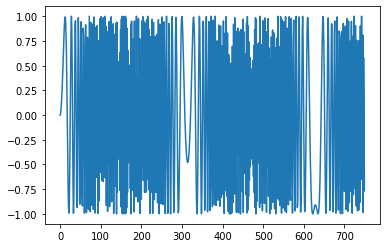

In [7]:
# Generate the synthetic data
series = np.sin((0.1*np.arange(750))**2)
# plot the data
plt.plot(series)

In [12]:
# Build the dataset
T = 10
D = 1
X = []
Y = []
for t in range(len(series) - T):
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)
X = np.array(X).reshape(-1, T, 1) # Make it NxTxD so we can pass it directly to RNN
Y = np.array(Y)
N = len(X)
print(X.shape, Y.shape)

(740, 10, 1) (740,)


In [0]:
# Split the data into train and test set
# I'll use first half of the set for train and the second half for the test since we're doing forecasting 
X_train, X_test, y_train, y_test = X[:-N//2], X[-N//2:], Y[:-N//2], Y[-N//2:]

In [0]:
# function for one-step forecasting
def onestep_forecast(model, dataX, dataY, title = 'Many-to-One RNN'):
  preds = model.predict(dataX)
  preds = preds[:,0]

  plt.plot(dataY, label = 'target')
  plt.plot(preds, label = 'predictions')
  plt.title(title)
  plt.legend()
  plt.show()

In [0]:
# function for multi-step forecasting
def multistep_forecast(model, dataX, dataY, N, title = 'RNN Forecast'):
  forecast = []
  input_ = dataX[-N//2]
  target = dataY[-N//2:]
  while len(forecast) < len(target):
    f = model.predict(input_.reshape(-1, T, 1))[0,0]
    forecast.append(f)

    # make a new input
    input_ = np.roll(input_, -1) # shift everything to the left
    input_[-1] = f # assign new input variable

  plt.plot(target, label = 'target')
  plt.plot(forecast, label = 'forecast')
  plt.title(title)
  plt.show()

Train on 370 samples, validate on 370 samples
Epoch 1/200
370/370 [==============================] - 1s 4ms/sample - loss: 0.5108 - val_loss: 0.5733
Epoch 2/200
370/370 [==============================] - 0s 230us/sample - loss: 0.4594 - val_loss: 0.5153
Epoch 3/200
370/370 [==============================] - 0s 217us/sample - loss: 0.3413 - val_loss: 0.4418
Epoch 4/200
370/370 [==============================] - 0s 245us/sample - loss: 0.2197 - val_loss: 0.3203
Epoch 5/200
370/370 [==============================] - 0s 220us/sample - loss: 0.1111 - val_loss: 0.1742
Epoch 6/200
370/370 [==============================] - 0s 225us/sample - loss: 0.0605 - val_loss: 0.1134
Epoch 7/200
370/370 [==============================] - 0s 256us/sample - loss: 0.0306 - val_loss: 0.0597
Epoch 8/200
370/370 [==============================] - 0s 221us/sample - loss: 0.0248 - val_loss: 0.0486
Epoch 9/200
370/370 [==============================] - 0s 224us/sample - loss: 0.0187 - val_loss: 0.0548
Epoch 10/20

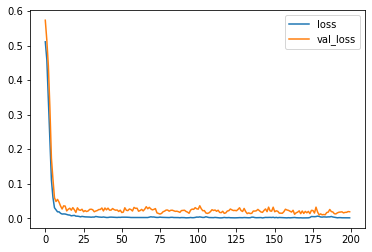

In [26]:
# Build the LSTM model
lstm_model = Sequential([
  Input(shape = (T,D)),
  LSTM(10),
  Dense(1)
])
lstm_model.compile(loss = 'mse', optimizer = Adam(lr = 0.05))

r_lstm = lstm_model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 200, batch_size = 32)

plt.plot(r_lstm.history['loss'], label = 'loss')
plt.plot(r_lstm.history['val_loss'], label = 'val_loss')
plt.legend()
plt.show()

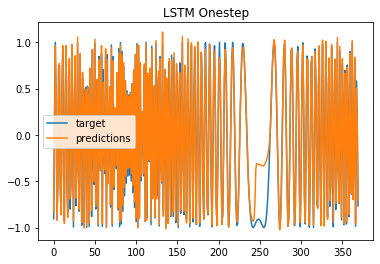

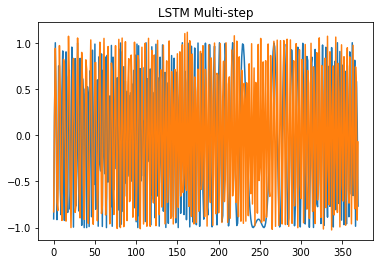

In [35]:
# get the results and plot the predictions
onestep_lstm_forecast = onestep_forecast(lstm_model, X_test, y_test, title = 'LSTM Onestep') # one-step forecasting
multistep_lstm_forecast = multistep_forecast(lstm_model, X_test, y_test, N, title = 'LSTM Multi-step') # multi-step forecasting

Train on 370 samples, validate on 370 samples
Epoch 1/200
370/370 [==============================] - 2s 4ms/sample - loss: 0.5087 - val_loss: 0.5299
Epoch 2/200
370/370 [==============================] - 0s 294us/sample - loss: 0.5071 - val_loss: 0.5344
Epoch 3/200
370/370 [==============================] - 0s 268us/sample - loss: 0.4616 - val_loss: 0.5560
Epoch 4/200
370/370 [==============================] - 0s 263us/sample - loss: 0.3457 - val_loss: 0.4258
Epoch 5/200
370/370 [==============================] - 0s 255us/sample - loss: 0.2480 - val_loss: 0.4200
Epoch 6/200
370/370 [==============================] - 0s 258us/sample - loss: 0.1550 - val_loss: 0.2407
Epoch 7/200
370/370 [==============================] - 0s 261us/sample - loss: 0.0921 - val_loss: 0.1325
Epoch 8/200
370/370 [==============================] - 0s 276us/sample - loss: 0.0521 - val_loss: 0.1020
Epoch 9/200
370/370 [==============================] - 0s 257us/sample - loss: 0.0411 - val_loss: 0.0554
Epoch 10/20

[]

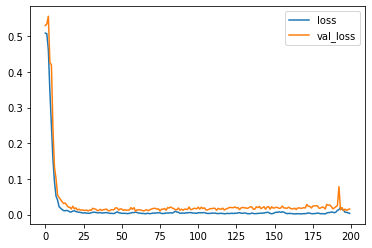

In [31]:
# Build the GRU model
gru_model = Sequential([
  Input(shape = (T,D)),
  GRU(10),
  Dense(1)
])
gru_model.compile(loss = 'mse', optimizer = Adam(lr = 0.05))

r_gru = gru_model.fit(X_train, y_train, validation_data = (X_test, y_test), batch_size = 32, epochs = 200)

# plot the loss 
plt.plot(r_gru.history['loss'], label = 'loss')
plt.plot(r_gru.history['val_loss'], label = 'val_loss')
plt.legend()
plt.plot()

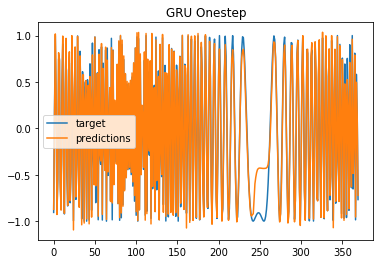

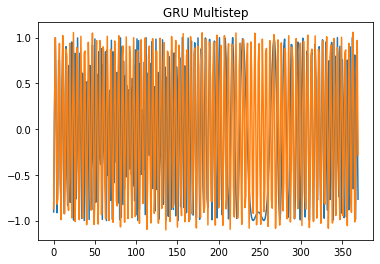

In [36]:
# Same process as LSTM
onestep_gru_forecast = onestep_forecast(gru_model, X_test, y_test, title = 'GRU Onestep')
multistep_gru_forecast = multistep_forecast(gru_model, X_test, y_test, N, title = 'GRU Multistep')

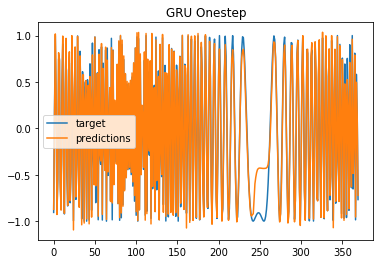

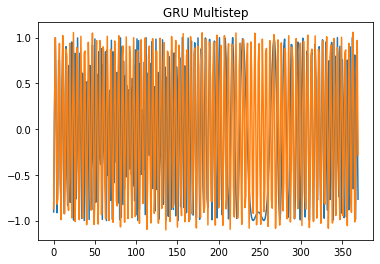

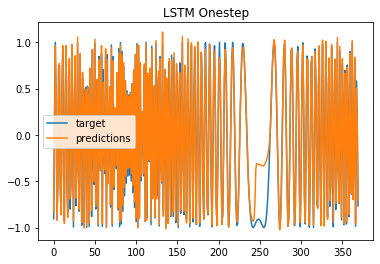

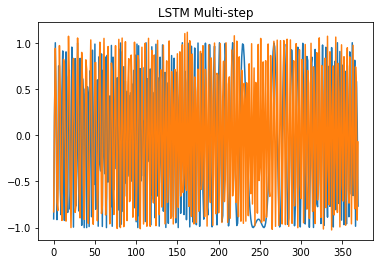

In [38]:
# Compare the results
onestep_gru_forecast = onestep_forecast(gru_model, X_test, y_test, title = 'GRU Onestep')
multistep_gru_forecast = multistep_forecast(gru_model, X_test, y_test, N, title = 'GRU Multistep')
onestep_lstm_forecast = onestep_forecast(lstm_model, X_test, y_test, title = 'LSTM Onestep')
multistep_lstm_forecast = multistep_forecast(lstm_model, X_test, y_test, N, title = 'LSTM Multi-step')